In [10]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_csv('../Data/cs-training.csv')

In [3]:
df_train.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [4]:
#Default rate in the training sample:
df_train['SeriousDlqin2yrs'].mean() * 100

6.683999999999999

In [8]:
# missing values
for c in df_train.columns:
    print(c,df_train[c].isna().sum())

Unnamed: 0 0
SeriousDlqin2yrs 0
RevolvingUtilizationOfUnsecuredLines 0
age 0
NumberOfTime30-59DaysPastDueNotWorse 0
DebtRatio 0
MonthlyIncome 29731
NumberOfOpenCreditLinesAndLoans 0
NumberOfTimes90DaysLate 0
NumberRealEstateLoansOrLines 0
NumberOfTime60-89DaysPastDueNotWorse 0
NumberOfDependents 3924


# Number of dependents

/usr/local/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([8.6902e+04, 2.6316e+04, 1.9522e+04, 9.4830e+03, 0.0000e+00,
        2.8620e+03, 7.4600e+02, 1.5800e+02, 5.1000e+01, 0.0000e+00,
        2.4000e+01, 5.0000e+00, 5.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([ 0. ,  0.8,  1.6,  2.4,  3.2,  4. ,  4.8,  5.6,  6.4,  7.2,  8. ,
         8.8,  9.6, 10.4, 11.2, 12. , 12.8, 13.6, 14.4, 15.2, 16. , 16.8,
        17.6, 18.4, 19.2, 20. ]),
 <a list of 25 Patch objects>)

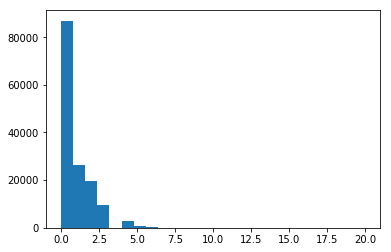

In [25]:
plt.hist(df_train['NumberOfDependents'],bins=25)

In [26]:
df_train['NumberOfDependents'].mean()

0.7572222678605657

In [27]:
df_train['NumberOfDependents'].median()

0.0

In [28]:
df_train[df_train['NumberOfDependents']==0]['SeriousDlqin2yrs'].mean()*100

5.862926054636257

In [29]:
df_train[df_train['NumberOfDependents'].isna()==True]['SeriousDlqin2yrs'].mean()*100

4.5616717635066255

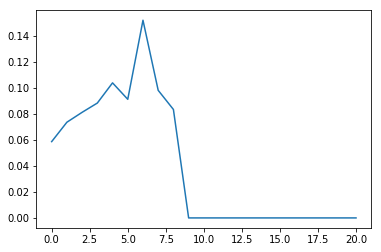

In [30]:
df_train_NoD = df_train.groupby(by=['NumberOfDependents'],as_index=False)['SeriousDlqin2yrs'].agg('mean')
plt.plot(df_train_NoD['NumberOfDependents'],df_train_NoD['SeriousDlqin2yrs'])

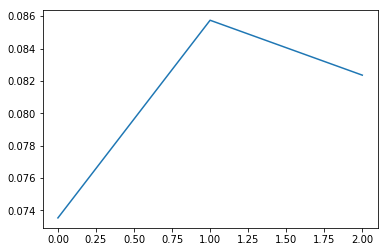

In [65]:
df_train['NumberOfDependents_binned'] = pd.cut(df_train['NumberOfDependents'],bins=[0,1,6,10],labels=False)
df_train_NoD = df_train.groupby(by=['NumberOfDependents_binned'],as_index=False)['SeriousDlqin2yrs'].agg('mean')
plt.plot(df_train_NoD['NumberOfDependents_binned'],df_train_NoD['SeriousDlqin2yrs'])

In [62]:
df_train_NoD 

,MonthlyIncome_binned,SeriousDlqin2yrs
0,0.0,0.028099
1,1.0,0.100000
2,2.0,0.000000
3,3.0,0.000000


# Monthly Income

(array([1.20252e+05, 7.00000e+00, 6.00000e+00, 1.00000e+00, 0.00000e+00,
        2.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([      0.,  300875.,  601750.,  902625., 1203500., 1504375.,
        1805250., 2106125., 2407000., 2707875., 3008750.]),
 <a list of 10 Patch objects>)

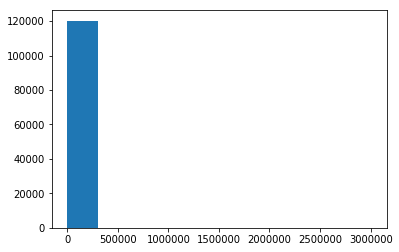

In [54]:
plt.hist(df_train['MonthlyIncome'])

In [55]:
df_train['MonthlyIncome'].median()

5400.0

In [59]:
df_train[df_train['MonthlyIncome'].isna()==True]['SeriousDlqin2yrs'].mean()*100

5.613669234132724

In [60]:
df_train[df_train['MonthlyIncome']==5400]['SeriousDlqin2yrs'].mean()*100

6.646525679758309

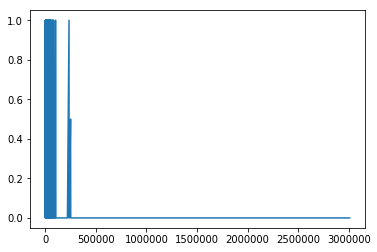

In [56]:
df_train_NoD = df_train.groupby(by=['MonthlyIncome'],as_index=False)['SeriousDlqin2yrs'].agg('mean')
plt.plot(df_train_NoD['MonthlyIncome'],df_train_NoD['SeriousDlqin2yrs'])

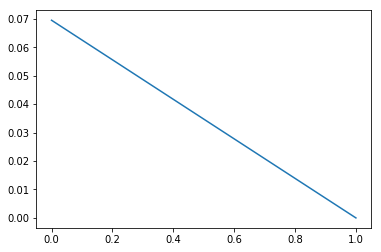

In [70]:
df_train['MonthlyIncome_binned'] = pd.cut(df_train['MonthlyIncome'],bins=2,labels=False)
df_train_NoD = df_train.groupby(by=['MonthlyIncome_binned'],as_index=False)['SeriousDlqin2yrs'].agg('mean')
plt.plot(df_train_NoD['MonthlyIncome_binned'],df_train_NoD['SeriousDlqin2yrs'])